In [36]:
%%capture
%pip install scikit-fda

In [58]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from skfda import FDataGrid
from skfda.preprocessing.smoothing import BasisSmoother
from skfda.preprocessing.dim_reduction.projection import FPCA
from skfda.exploratory.visualization import FPCAPlot

from google.colab import drive

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
df = pd.read_csv('/content/drive/My Drive/master/fda/temp_only.csv')

In [66]:
df['dt'] = pd.to_datetime(df['dt'])
df['month'] = df['dt'].dt.month
df['year'] = df['dt'].dt.year
month_counts = df.groupby('year')['month'].transform('nunique')
df = df[month_counts == 12]

In [68]:
df.describe(include='all')

,dt,avg_temp,avg_temp_uncertainty,country,month,year
count,4068,4068.000000,4068.000000,4068,4068.000000,4068.000000
unique,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,NaN,Bahamas,NaN,NaN
freq,NaN,NaN,NaN,1356,NaN,NaN
mean,1956-06-16 02:05:18.584070784,22.168958,0.416817,NaN,6.500000,1956.000000
min,1900-01-01 00:00:00,10.150000,0.076000,NaN,1.000000,1900.000000
25%,1928-03-24 06:00:00,20.676000,0.279000,NaN,3.750000,1928.000000
50%,1956-06-16 00:00:00,22.907000,0.367000,NaN,6.500000,1956.000000
75%,1984-09-08 12:00:00,24.647000,0.495000,NaN,9.250000,1984.000000
max,2012-12-01 00:00:00,29.613000,2.403000,NaN,12.000000,2012.000000


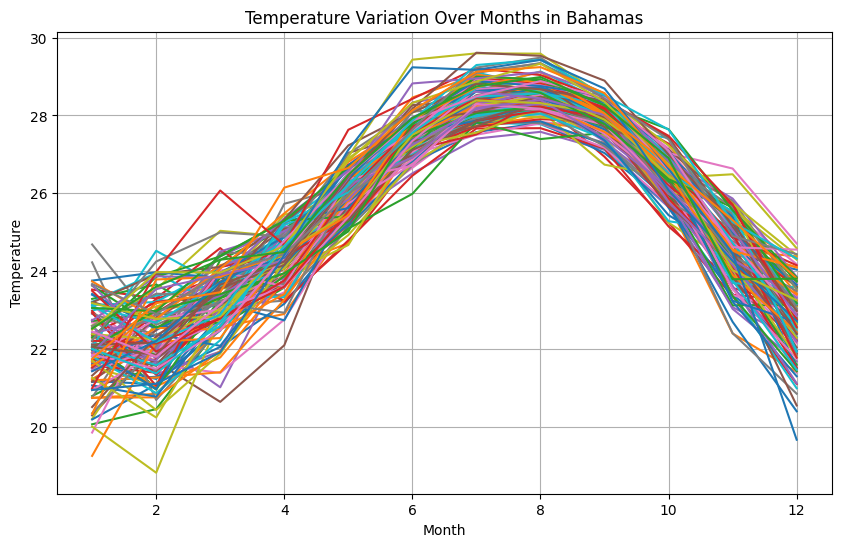

------------------------------------------------------------
------------------------------------------------------------


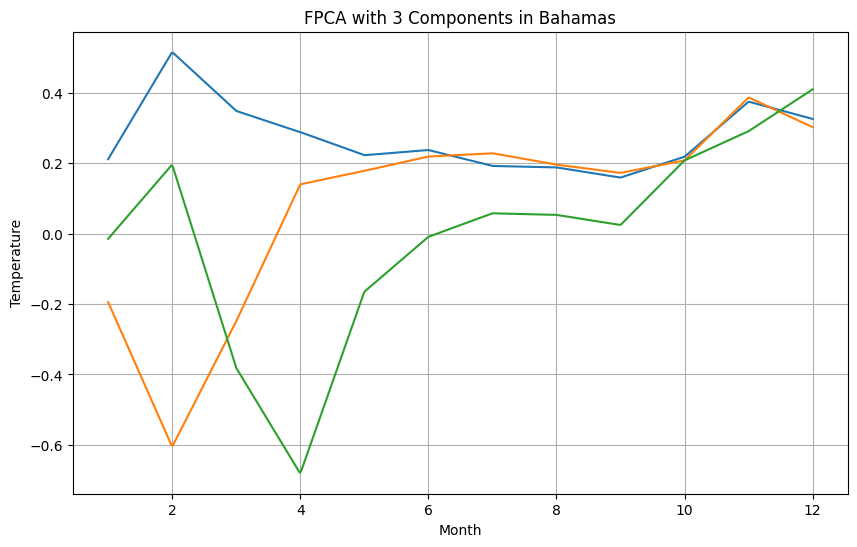

------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------


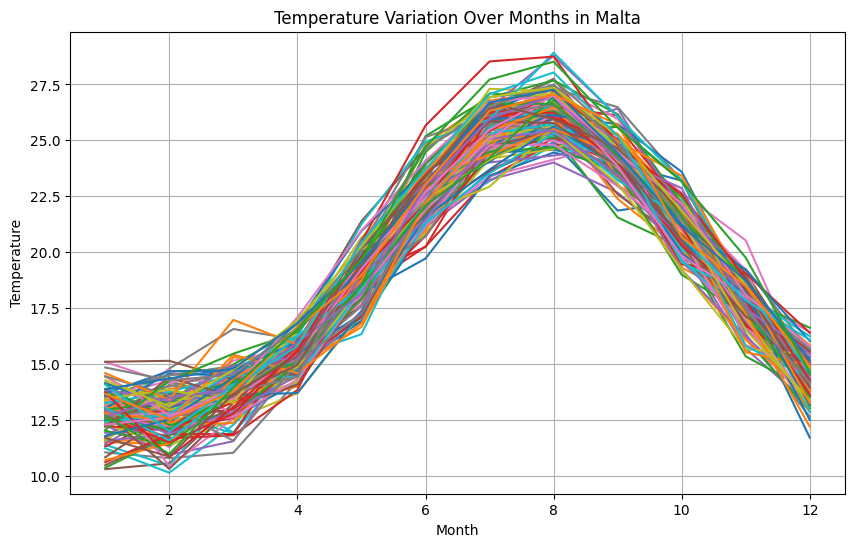

------------------------------------------------------------
------------------------------------------------------------


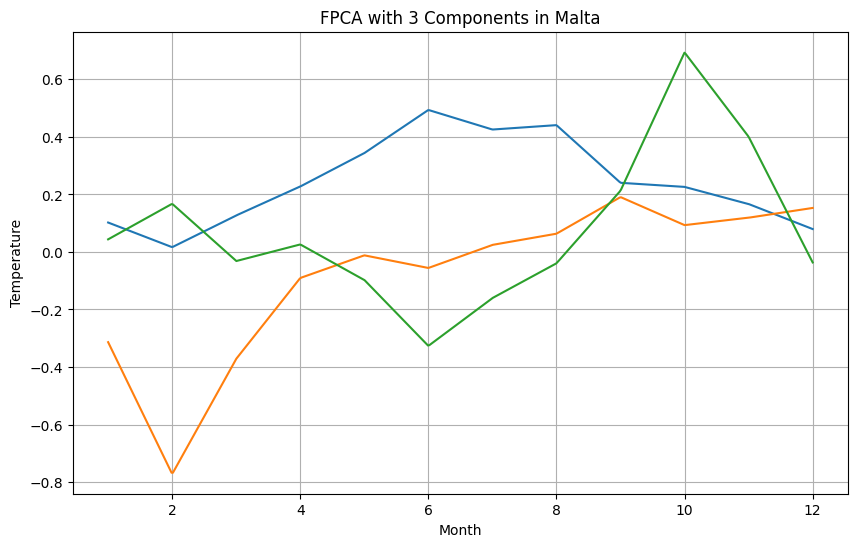

------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------


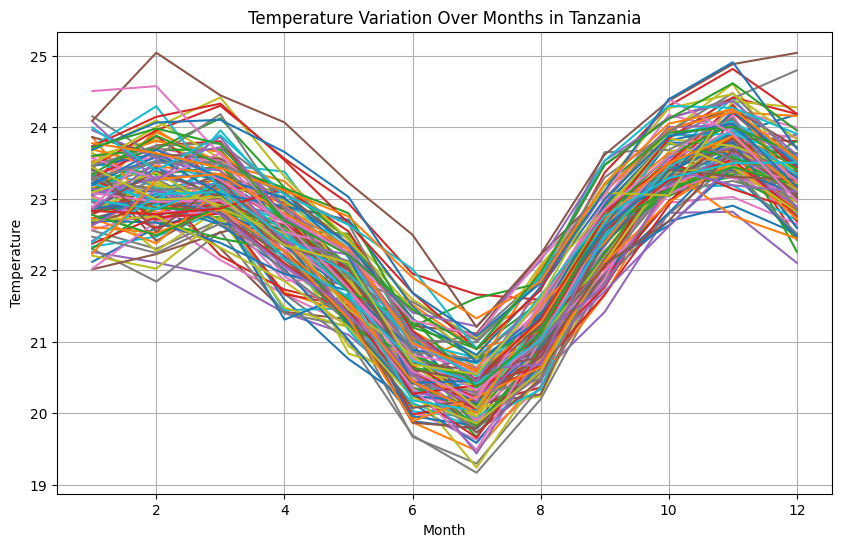

------------------------------------------------------------
------------------------------------------------------------


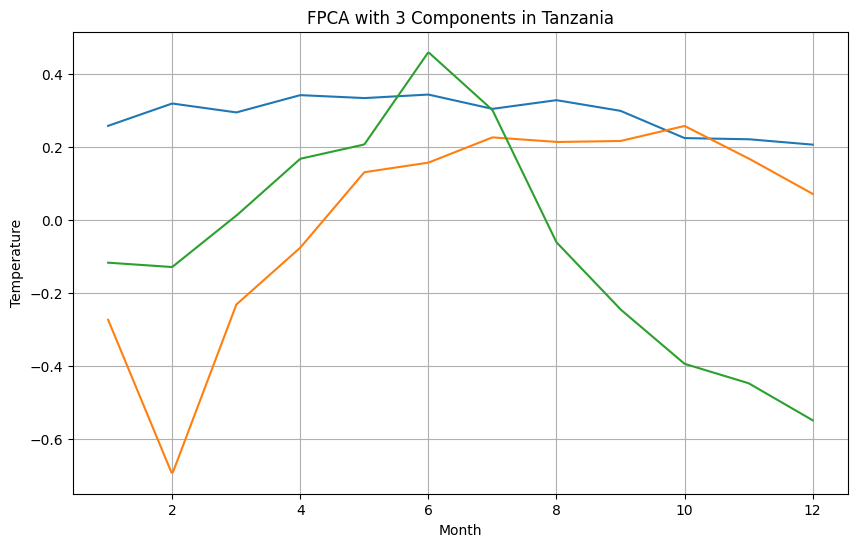

------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------
------------------------------------------------------------


In [71]:
for country in ['Bahamas', 'Malta', 'Tanzania']:
    sliced_df = df[df.country==country].copy()
    pivot_df = sliced_df.pivot(index='month', columns='year', values='avg_temp')
    plt.figure(figsize=(10, 6))

    for year in pivot_df.columns:
        plt.plot(pivot_df.index, pivot_df[year])

    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.title(f'Temperature Variation Over Months in {country}')
    plt.grid(True)
    plt.show()

    print('---'*20)
    print('---'*20)
    pivot_df.dropna(inplace=True)
    data_matrix = pivot_df.to_numpy().T
    grid_points = np.arange(1, len(pivot_df) + 1)
    fd_grid = FDataGrid(data_matrix, grid_points=[grid_points])

    fpca_discretized = FPCA(n_components=3)
    fpca_discretized.fit(fd_grid)
    fig, ax = plt.subplots(figsize=(10,6))
    fpca_discretized.components_.plot(fig=fig)
    plt.xlabel('Month')
    plt.ylabel('Temperature')
    plt.grid(True)
    plt.title(f'FPCA with 3 Components in {country}')
    plt.show()


    print('---'*20)
    print('---'*20)
    print('---'*20)
    print('---'*20)
